In [1]:
# Too work with arguments and script paths
import sys

# scientific libraries and utilities
import numpy as np
import pandas as pd
import random
import time
import matplotlib.pyplot as plt

# GA library
from deap import base
from deap import creator
from deap import tools

# Visualization tools
from bokeh.plotting import figure, output_notebook, show
from bokeh.layouts import gridplot, column
from bokeh.layouts import row as layout_row
from bokeh.models.annotations import Arrow, Label
from bokeh.models.arrow_heads import OpenHead, NormalHead, VeeHead
from bokeh.models import ColumnDataSource, Div, Whisker, Span, Range1d
from bokeh.io import export_svgs, export_png

# To reload modules
import importlib

# XML tools
import xml.etree.ElementTree as ET

# Copy tools
import copy

# Display useful loading of bokeh library and start timer
output_notebook()
t0 = time.time()

sys.path.append('..')

Loading BokehJS ...

In [2]:
# 1. Specify instance name
instanceName = 'd1c7cs2_ev2'

# 2. Specify file and folder paths
folderPath = '../data/GA_implementation_xml/'+instanceName+'/'
filePath = folderPath+instanceName+'.xml'
print('Opening:', filePath)

# 3. Open XML file
tree = ET.parse(filePath)
_info = tree.find('info')
_network = tree.find('network')
_fleet = tree.find('fleet')

Opening: ../data/GA_implementation_xml/d1c7cs2_ev2/d1c7cs2_ev2.xml


In [3]:
# 4. Store data
from res.Node import DepotNode, CustomerNode, ChargeStationNode

# [START Node data]
_nodes = _network.find('nodes')
_edges = _network.find('edges')
_technologies = _network.find('technologies')

nodes = []
for _node in _nodes:
    node_type = _node.get('type')
    id_node = int(_node.get('id'))
    pos = (float(_node.get('cx')), float(_node.get('cy')))
    if node_type == '0':
        node = DepotNode(id_node, pos=pos)
    
    elif node_type == '1':
        tw_upp = float(_node.get('tw_upp'))
        tw_low = float(_node.get('tw_low'))
        demand = float(_node.get('request'))
        spent_time = float(_node.get('spent_time'))
        node = CustomerNode(id_node, spent_time, demand, tw_upp, tw_low, pos=pos)
    
    elif node_type == '2':
        index_technology = int(_node.get('technology')) - 1
        _technology = _technologies[index_technology]
        charging_times = []
        battery_levels = []
        for _bp in _technology:
            charging_times.append(float(_bp.get('charging_time')))
            battery_levels.append(float(_bp.get('battery_level')))
        capacity = _node.get('capacity')
        node = ChargeStationNode(id_node, capacity, charging_times, battery_levels, pos=pos)
    
    nodes.append(node)

networkSize = len(nodes)

print('There are', networkSize, 'nodes in the network.')

# [END Node data]

There are 10 nodes in the network.


In [4]:
# [START Edge data]
id_nodes = [x.id for x in nodes]
timeMatrix = np.zeros((networkSize, networkSize))
energyMatrix = np.zeros((networkSize, networkSize))
coordinates = {}

for i, nodeFrom in enumerate(_edges):
    for j, nodeTo in enumerate(nodeFrom):
        timeMatrix[i][j] = float(nodeTo.get('travel_time'))
        energyMatrix[i][j] = float(nodeTo.get('energy_consumption'))
    coordinates[i] = nodes[i].pos

# Show stored values
print('NODES IDSs:\n', id_nodes)
print('RESULTING TIME MATRIX:\n', timeMatrix)
print('RESULTING ENERGY CONSUMPTION MATRIX:\n', energyMatrix)
print('RESULTING NODES COORDINATES:\n',coordinates)
# [END Edge data]


NODES IDSs:
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
RESULTING TIME MATRIX:
 [[ 0.   33.55 13.51 10.43 28.9  13.89 11.45 11.76  4.4  30.98]
 [21.88  0.   28.28 11.75 13.27 23.03 33.01 25.77  6.27 21.48]
 [12.96 24.94  0.   24.8  29.86  5.03  3.39  9.72 34.31 16.99]
 [31.25 29.16  8.42  0.   15.26  6.05  9.52  3.34  7.11 26.19]
 [ 3.79 30.98 30.15 14.4   0.   25.73 18.33 22.72 28.86 11.82]
 [12.98 15.85 13.93 29.79 14.79  0.   16.36  9.36 32.99 15.85]
 [16.11 18.6  21.52 23.9  18.8  29.28  0.    8.03 31.2  10.66]
 [24.07 19.13 28.19  5.36  4.14 20.56 25.61  0.   20.99 33.17]
 [12.92  7.1  27.26 28.64 27.28 11.78 24.57 12.26  0.   22.48]
 [27.82 33.4   9.95 33.73 11.24 21.46 16.84 15.53 20.42  0.  ]]
RESULTING ENERGY CONSUMPTION MATRIX:
 [[0.   9.25 5.04 5.77 3.62 5.67 6.16 9.96 6.12 6.47]
 [4.35 0.   3.67 2.39 3.21 8.24 5.72 5.83 7.8  7.22]
 [4.86 7.96 0.   4.3  7.93 5.   9.19 6.08 6.93 6.52]
 [8.52 7.9  8.19 0.   3.27 8.8  7.28 9.45 6.26 4.74]
 [8.37 4.55 5.34 6.1  0.   2.6  4.93 8.48 6.82 4.96

C:\Users\jpfut\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\jpfut\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


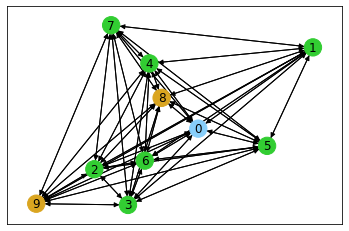

energy_consumption 7.2


In [5]:
# 5. Instance Network
from res.Network import Network

net = Network(nodes, timeMatrix, energyMatrix)
net.draw()

# Usage example
f = 5
t = 6
key = 'energy_consumption'
print(key, net[f][t][key])

In [1]:
# 6. EVs attributes
numVehicles = int(_fleet.find('fleet_size').text)

attrib = {}
for _attrib in _fleet.find('vehicle_attributes'):
    attrib[_attrib.tag] = float(_attrib.text)

print('EV attributes:', attrib, '\n')

# 7. Proposal of how many customers each EV will visit
customers_per_car = [int(len(net.ids_customer) / numVehicles)] * numVehicles
if len(net.ids_customer) % numVehicles != 0:
        customers_per_car[-1] = int(len(net.ids_customer) / numVehicles) + 1
        
for i, j in enumerate(customers_per_car):
    print('Car', i, 'must visit', j, 'customer/s')
print('\n')

# 8. Instantiate EVS with initial sequences and attributes
from res.EV import ElectricVehicle

vehicles_dict = {}
ids_customer = copy.deepcopy(net.ids_customer)
for id_car, num_customers in enumerate(customers_per_car):
    # sequences
    ids_customer_to_visit = []
    for j in range(0, num_customers):
        index = random.randint(0, len(ids_customer) - 1)
        ids_customer_to_visit.append(ids_customer.pop(index))
    print('Car', id_car, 'must visit customers with ID:', ids_customer_to_visit)
    
    # First decision variables
    node_sequence = [0] + ids_customer_to_visit + [0]
    charging_sequence = [0] * len(node_sequence)
    departure_time = 24.0 * 30.0
    
    # Other variables   
    attrib['x2_0'] = 80
    
    # instantiate
    ev = ElectricVehicle(id_car, node_sequence, charging_sequence, departure_time, net, **attrib)
    vehicles_dict[id_car] = ev
    print(ev.iterateState())

NameError: name '_fleet' is not defined